In [1]:
from os import listdir
import urllib.request
import csv
import pandas as pd
import json
import requests
import time
from pathlib import Path
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pandas.plotting import scatter_matrix

# COMP41680 Assignment 1

## Data Identification:
I used multiple calls from one API from https://www.alphavantage.co. The calls were on crypto currency and stock market. I was very interested in seeing the behaviour of some cryptocurrencies as well as the Dow Jones and Amazon in respect with the current situation of COVID-19. I was wondering if some investors would use crypto-currency in these difficult time as they often do with government bonds, which is much more demand, increasing the value of the bond.
The API might be under maintaince at time of use.
I received the following key to use the API:

In [2]:
key = 'RVSKOJZV6ONWL2OV'

## Collecting Data and Parsing
For this part I created two lists containing crypto-currencies, and normal currencies that I am interested in seeing a comparison with.
I created an empty list where my crypto-curency and currency links are going to be stored, plus two extra variables for for DowJones prices over time and for Amazon stock prices over time.

In [3]:
#Creating lists containing currencies, and two variables with urls for DowJones and Amazon
crypto_currency= ["BTC", "ETH", "LTC", "XRP"]
currency= ["EUR","USD", "CNY"]
link=[]
Link2 = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=DJI&outputsize=full&apikey="+key
Link3 = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey="+key


I then did a loop to combine all currencies with crypto-currencies in the link and appended each url to the empty list "Link". Following another for loop, to make calls using the recently stored links, then parsing the data and creating a csv file if there is none already, or appending to an already existing file.

In [5]:
#for loop to store all currency urls in a list
for i in currency:
    for j in crypto_currency:
        link.append( "https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=" + j + "&to_currency=" + i + "&apikey=" + key)
#for loop to use urls in list to make calls and extract data for combinantion of currencies
for l in link:
    response = requests.get(l)
    js_data = response.json()
    js_data = js_data['Realtime Currency Exchange Rate']
    parse = json.dumps(js_data)
    data = json.loads(parse)
    df = pd.DataFrame(data, index=[0])
#     cr = l[80:83]
#     cu = l[96:99]
#If the file does not exist then create, if the file exists then append.
    if Path('Currency.csv').is_file():
        csv =  df.to_csv (r'Currency.csv', mode='a', header=False)
        time.sleep(15)
    else:
        csv =  df.to_csv (r'Currency.csv', header=True, index= False)
        time.sleep(15)



In the following code I apply the same process to parse and store the DowJones and Amazon data. It is worth noting that: 1. The data came as dictionaries. 2. When retreiving from within the dictionary the index and columns were inverse.

In [6]:
#extracting data from DowJones and Amazon urls
response2 = requests.get(Link2)
response3 = requests.get(Link3)

In [7]:
#parse DowJones data 
js_data2 = response2.json()
js_data2 = js_data2["Time Series (Daily)"]
parse2 = json.dumps(js_data2)
data2 = json.loads(parse2)
df2 = pd.DataFrame(data2)
df2


,2020-03-31,2020-03-30,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23,2020-03-20,2020-03-19,2020-03-18,...,2000-01-14,2000-01-13,2000-01-12,2000-01-11,2000-01-10,2000-01-07,2000-01-06,2000-01-05,2000-01-04,2000-01-03
1. open,22208.4199,21678.2207,21898.4707,21468.3809,21050.3398,19722.1895,19028.3594,20253.1504,19830.0098,20188.6895,...,11619.3496,11558.2402,11506.7305,11568.4697,11532.4805,11247.0596,11113.3701,10989.3701,11349.7500,11501.8496
2. high,22480.3691,22378.0898,22327.5703,22595.0605,22019.9297,20737.6992,19121.0098,20531.2598,20442.6309,20489.3301,...,11750.2803,11656.5801,11612.5303,11663.0996,11638.2803,11528.1396,11313.4502,11215.0996,11350.0596,11522.0098
3. low,21852.0801,21522.0801,21469.2695,21427.0996,20538.3398,19649.2500,18213.6504,19094.2695,19177.1309,18917.4609,...,11612.5303,11524.1104,11505.1797,11502.7002,11532.4805,11239.9199,11098.4502,10938.6699,10986.4502,11305.6904
4. close,21917.1602,22327.4805,21636.7793,22552.1699,21200.5508,20704.9102,18591.9297,19173.9805,20087.1895,19898.9199,...,11722.9805,11582.4297,11551.0996,11511.0801,11572.2002,11522.5596,11253.2598,11122.6504,10997.9297,11357.5098
5. adjusted close,21917.1602,22327.4805,21636.7793,22552.1699,21200.5508,20704.9102,18591.9297,19173.9805,20087.1895,19898.9199,...,11722.9805,11582.4297,11551.0996,11511.0801,11572.2002,11522.5596,11253.2598,11122.6504,10997.9297,11357.5098
6. volume,571212421,545540000,588830000,705180000,796320000,799340000,787970000,872290000,780300000,871360000,...,266830000,174910000,194060000,177300000,168180000,184900000,176550000,203190000,178420000,169750000
7. dividend amount,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8. split coefficient,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


The way to solve this I found, was to revert it back to json using orient to index, this will pivot the index and columns around:

In [8]:
# change orient to have the dates as column
df2 = df2.to_json(orient='index')
df2 = json.loads(df2)
df2 = pd.DataFrame.from_dict(df2)
df2.head(5)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2000-01-03,11501.8496,11522.0098,11305.6904,11357.5098,11357.5098,169750000,0.0000,1.0000
2000-01-04,11349.7500,11350.0596,10986.4502,10997.9297,10997.9297,178420000,0.0000,1.0000
2000-01-05,10989.3701,11215.0996,10938.6699,11122.6504,11122.6504,203190000,0.0000,1.0000
2000-01-06,11113.3701,11313.4502,11098.4502,11253.2598,11253.2598,176550000,0.0000,1.0000
2000-01-07,11247.0596,11528.1396,11239.9199,11522.5596,11522.5596,184900000,0.0000,1.0000


Here we take our currency csv file and take what we need and rename the columns for aesthetics:

In [9]:
#Taking currency csv file
data = pd.read_csv('Currency.csv')
#Currency csv to pandas data frame
df = pd.DataFrame(data)
# df.drop(["0"],axis=1)
#Remove unwanted columns
df = df.drop(columns=['Unnamed: 0','7. Time Zone'])
#rename columns for a better look (currencies and DowJones)
df = df.rename(columns={"1. From_Currency Code":"From_Currency_Code", "2. From_Currency Name":"From_Currency_Name", "3. To_Currency Code":"To_Currency_Code","4. To_Currency Name":"To_Currency_Name","5. Exchange Rate":"Exchange_Rate","6. Last Refreshed":"Refreshed", "8. Bid Price":"Bid_Price", "9. Ask Price":"Ask_Price"})
df2 = df2.rename(columns = {"1. open": "Open", "2. high":"High","3. low":"Low","4. close":"Close","5. adjusted close":"Adjusted","6. volume":"Volume", "7. dividend amount":"Dividend","8. split coefficient":"Split"})
df2 = df2[["Open","Close"]]
csv =  df2.to_csv (r'DowJones.csv', header=True, index= True)


We follow the same steps for the Amazon data set.

In [10]:
js_data3 = response3.json()
js_data3 = js_data3["Time Series (Daily)"]
parse3 = json.dumps(js_data3)
data3 = json.loads(parse3)
df3 = pd.DataFrame(data3)
df3 = df3.to_json(orient='index')
df3 = json.loads(df3)
df3 = pd.DataFrame.from_dict(df3)
df3 = df3.rename(columns = {"1. open": "Open", "2. high":"High","3. low":"Low","4. close":"Close","5. adjusted close":"Adjusted","6. volume":"Volume", "7. dividend amount":"Dividend","8. split coefficient":"Split"})
df3 = df3[["Open","Close"]]
csv =  df3.to_csv (r'Amazon.csv', header=True, index= True)

In [11]:
dfjones = pd.read_csv("DowJones.csv")
dfjones.columns=["Date", "Open", "Close"]


In [12]:
dfAmazon = pd.read_csv("Amazon.csv")
dfAmazon.columns=["Date", "Open", "Close"]

## Load and represent the data using an appropriate structure.
The following are a part of the three data frames that I will be working with (After renaming and cutting off any unnecessary columns, and displaying the 5 most recent rows).

In [13]:
#Crypto-currency to currency table (last entry, 12 rows per call)
df.tail(12)

,From_Currency_Code,From_Currency_Name,To_Currency_Code,To_Currency_Name,Exchange_Rate,Refreshed,Bid_Price,Ask_Price
588,BTC,Bitcoin,EUR,Euro,5854.010280,2020-03-31 20:57:03,5853.838140,5854.010280
589,ETH,Ethereum,EUR,Euro,121.820760,2020-03-31 20:57:05,121.811700,121.820760
590,LTC,Litecoin,EUR,Euro,35.478960,2020-03-31 20:57:07,35.460840,35.478960
591,XRP,Ripple,EUR,Euro,0.160598,2020-03-31 20:58:03,0.160589,0.160598
592,BTC,Bitcoin,USD,United States Dollar,6464.870000,2020-03-31 20:58:01,6464.870000,6464.880000
593,ETH,Ethereum,USD,United States Dollar,134.480000,2020-03-31 20:58:01,134.460000,134.470000
594,LTC,Litecoin,USD,United States Dollar,39.160000,2020-03-31 20:58:04,39.150000,39.170000
595,XRP,Ripple,USD,United States Dollar,0.177490,2020-03-31 20:59:06,0.177470,0.177490
596,BTC,Bitcoin,CNY,Chinese Yuan,45817.046625,2020-03-31 20:59:06,45809.822475,45817.046625
597,ETH,Ethereum,CNY,Chinese Yuan,952.525425,2020-03-31 20:59:37,952.383775,952.596250


In [14]:
#DowJones table (latest)
dfjones.tail(5)

,Date,Open,Close
5088,2020-03-25,21050.3398,21200.5508
5089,2020-03-26,21468.3809,22552.1699
5090,2020-03-27,21898.4707,21636.7793
5091,2020-03-30,21678.2207,22327.4805
5092,2020-03-31,22208.4199,21917.1602


In [15]:
#Amazon stock table (latest)
dfAmazon.tail(5)

,Date,Open,Close
5027,2020-03-24,1952.01,1940.10
5028,2020-03-25,1920.69,1885.84
5029,2020-03-26,1902.00,1955.49
5030,2020-03-27,1930.86,1900.10
5031,2020-03-30,1922.83,1963.95


### Graphs and analysis
#### Crypto-Currencies
Below I will display graphs that I will use to analyse and compare different currencies and stocks with each other as the current situation with COVID-19 develops. I am interested in seeing if there is a relationship between the data and to the state of panic we have seen in the stock market a few weeks ago.

I combined the Euro with the US Dollar when viewing the price change for crypto currencies as the crisis unfolds. By doing so, it is easier to compare the prices for the given currency. I put the Chinese Yuan comparison with crypto currencies on a separate graph, since the value of the Yuan is very low (much higher value for Yuan for a single bitcoin), which pushes the other lines downwards if they were in the same graph. This would have made it difficult to analyse the US Dollar and Euro price chances for each crypto currency.

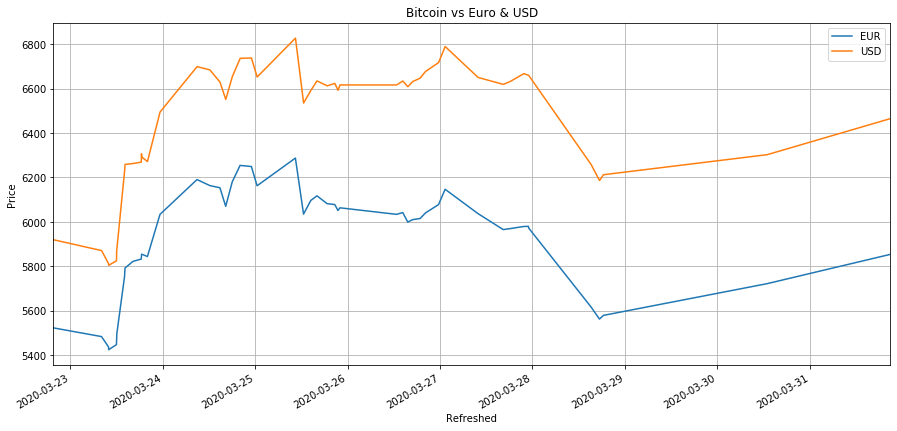

In [16]:
#Bitcoin vs Euro & USD

#Create a new variable that holds currencie dataframe where to currency code is Euro and USD as well as from currency code to be equal to Bitcoin
dfeus= df[((df["To_Currency_Code"] == "USD" )|(df["To_Currency_Code"] == "EUR" )) & (df["From_Currency_Code"] == "BTC")]
#Select wanted columns
dfeus = dfeus[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
#transform "Refreshed" into a date time format
dfeus['Refreshed'] =  pd.to_datetime(dfeus['Refreshed'])     
#subplot
fig, ax = plt.subplots(figsize=(15,7))
#plotting by grouping per to currency code, this is to divide into two lines, EUR and USD
dfeus.groupby("To_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=True, title="Bitcoin vs Euro & USD")
ax.legend( ["EUR","USD"])
plt.ylabel("Price")
ax.grid()

Above, we see the price for Bitcoins in both Euros and US Dollars. The first observation we can make is that they both follow the same trend through these last days of the COVID crisis, however, it seems like in the american market there are slightly sharper increases at some points, such as 24th and 28th of March. Overall, as one can expect, the trend is nearly the same for the exchange rate between Bitcoin with Euro and US Dollar. I would not expect the trend to change for any crypto-currency against the three different currencies, however, we might see some correlations and differences between different crypto-currencies exchange rates.

Next, we will compare bitcoin exchangerate with the Chinese Yuan, We are expecting a very similar pattern as it was with the previous graph. 

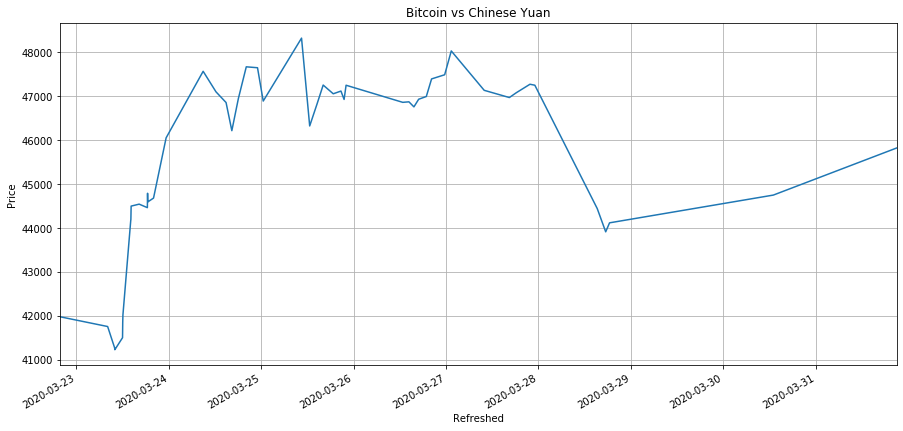

In [17]:
#CNY vs Bitcoin
dfcyn0= df[(df["To_Currency_Code"] == "CNY" )& (df["From_Currency_Code"] == "BTC")]
dfcyn0 = dfcyn0[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfcyn0['Refreshed'] =  pd.to_datetime(dfcyn0['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfcyn0.groupby("From_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=False, title="Bitcoin vs Chinese Yuan")
plt.ylabel("Price")
ax.grid()

After looking at the three exchange rates for Bitcoin, we can see that they are very close together in their pattern. In regards with the market reaction to the current crisis, it would seem that at these moments ofuncertainty, people are investing more in crypto currencies as they hold their value no matter the currency. As shown in the graph, the 23rd of March the value of Bitcoin jumped by 14% (calculated by taking the lowest point mid 23rd march and the top peak in the middle of the 24th, subtracting the values and dividing by the) in 24 hours from the 23rd to the 24th of March. Then we see a correction in the market towards the 29th of March, with an overall growth from the beginning of the graph of around 7-8% increase in value. This tells us that in fact people go to crypto-currencies when in uncertain times, just as they would with government bonds. However, the data shown is still too little to tell for certain.

In the following graphs, I am going to be comparing Ripple (XRT) crypto-currency with the tree currencies (USD, EUR, CNY). I would expect that all the cryto-currencies would follow a symilar trend. 

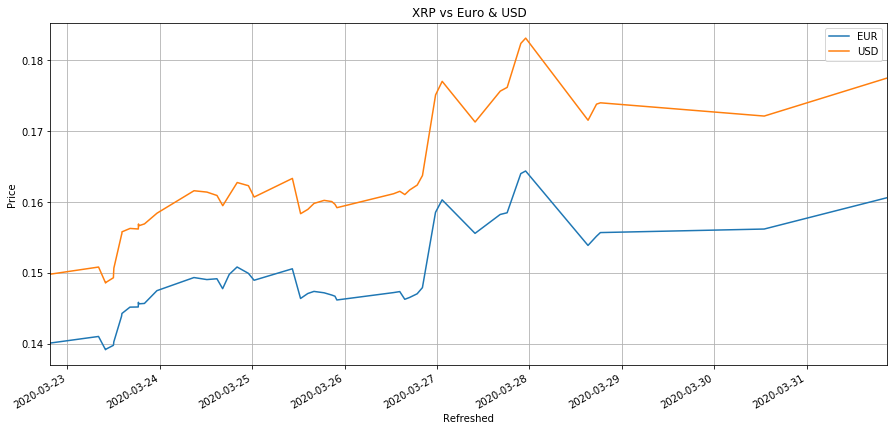

In [18]:
#XRP vs Euro & USD
dfeus= df[((df["To_Currency_Code"] == "USD" )|(df["To_Currency_Code"] == "EUR" )) & (df["From_Currency_Code"] == "XRP")]
dfeus = dfeus[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfeus['Refreshed'] =  pd.to_datetime(dfeus['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfeus.groupby("To_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=False, title="XRP vs Euro & USD")
plt.ylabel("Price")
ax.legend( ["EUR","USD"])
ax.grid()

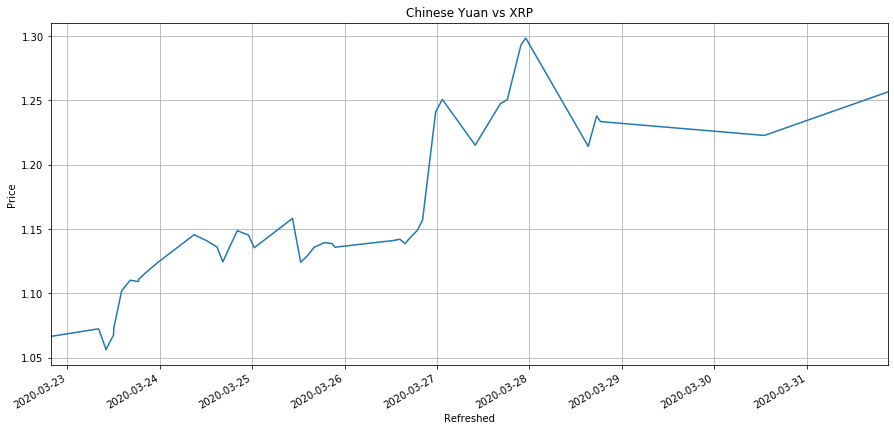

In [19]:
#CYN vs XRP
dfcyn3= df[(df["To_Currency_Code"] == "CNY" )& (df["From_Currency_Code"] == "XRP")]
dfcyn3 = dfcyn3[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfcyn3['Refreshed'] =  pd.to_datetime(dfcyn3['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfcyn3.groupby("From_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=False, title="Chinese Yuan vs XRP")
plt.ylabel("Price")
ax.grid()

After comparing the exchange rate for Ripple with the three currencies, we can observe that the trend is rather different from Bitcoin, in a way that it took longet for the crypto-currency to reach its peak, but the correction was less severe. Overall, while the trend was different, we see that the end result for Ripple was similar to Bitcoin, as in, we see an increase of 14-20% (14% again USD and EUR, and 20% against CNY) between the lowest point and the peak, and a correction in the market thereafter, with an overall increase of around 12-13%. We also observe that the trend of Ripple across all the currencies is the same, just as it is for Bitcoin.
This enforces the theory that crypto-currencies might be a good "safe-haven" in difficult times.

Next, we are going to see the exchange rate of the crypto-currency Ethereum (ETH) with our three currencies (USD, EUR, CNY).

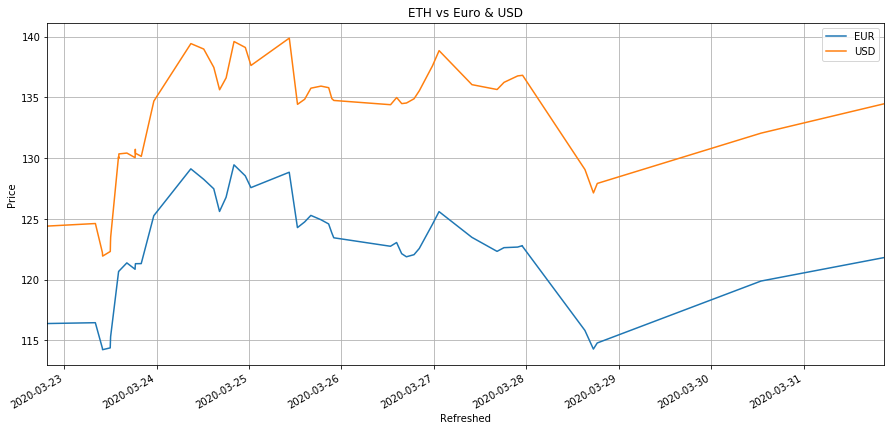

In [20]:
#ETH vs Euro & USD
dfeus= df[((df["To_Currency_Code"] == "USD" )|(df["To_Currency_Code"] == "EUR" )) & (df["From_Currency_Code"] == "ETH")]
dfeus = dfeus[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfeus['Refreshed'] =  pd.to_datetime(dfeus['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfeus.groupby("To_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=True, title="ETH vs Euro & USD")
plt.ylabel("Price")
ax.legend( ["EUR","USD"])
ax.grid()

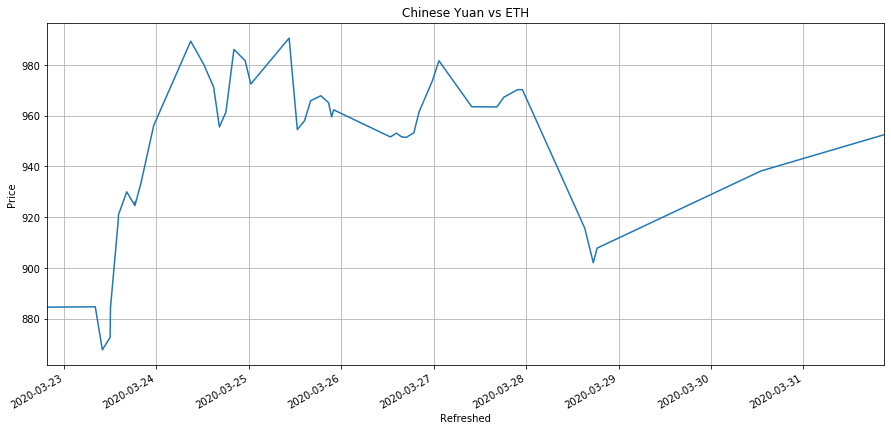

In [21]:
#CYN vs ETH
dfcyn1= df[(df["To_Currency_Code"] == "CNY" )& (df["From_Currency_Code"] == "ETH")]
dfcyn1 = dfcyn1[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfcyn1['Refreshed'] =  pd.to_datetime(dfcyn1['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfcyn1.groupby("From_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=False, title="Chinese Yuan vs ETH")
plt.ylabel("Price")
ax.grid()

As we can observe in the three graphs above, Ethereum follows almost completely the same trend as Bitcoin, with an 11% increase in value throughout the three currencies in the first days, and an overall increase of 6-7%.

Lastly, we will analyse the change in price for Litecoin in these past days. Again we are expecting to follow a similar trend as the previous crypto-currencies, and expect for the value to increase by at least 5% after a correction.

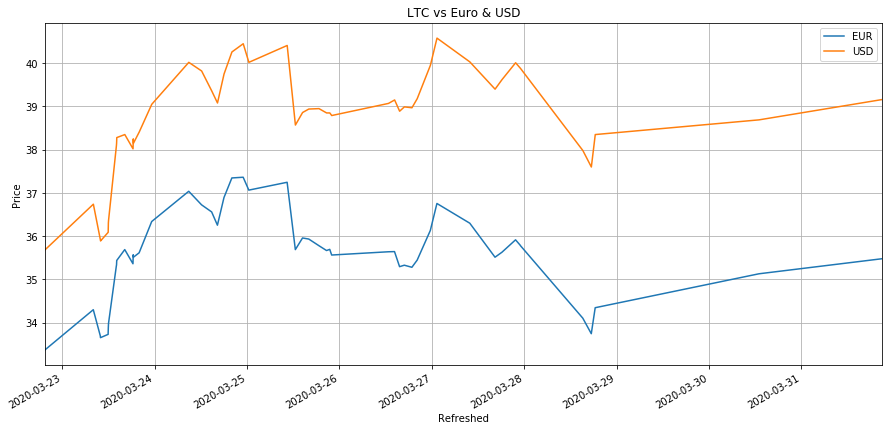

In [22]:
#LTC vs Euro & USD
dfeus= df[((df["To_Currency_Code"] == "USD" )|(df["To_Currency_Code"] == "EUR" )) & (df["From_Currency_Code"] == "LTC")]
dfeus = dfeus[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfeus['Refreshed'] =  pd.to_datetime(dfeus['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfeus.groupby("To_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=False, title="LTC vs Euro & USD")
plt.ylabel("Price")
ax.legend( ["EUR","USD"])
ax.grid()

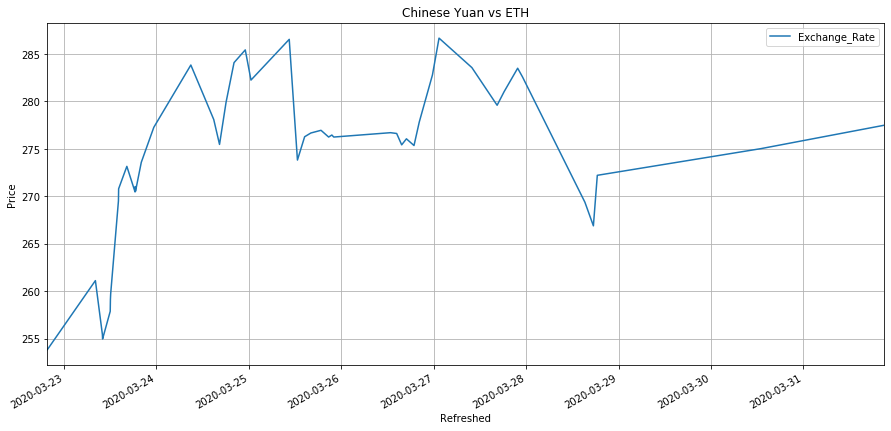

In [23]:
#CYN vs LTC
dfcyn4= df[(df["To_Currency_Code"] == "CNY" )& (df["From_Currency_Code"] == "LTC")]
dfcyn4 = dfcyn4[["From_Currency_Code","To_Currency_Code","Exchange_Rate", "Refreshed"]]
dfcyn4['Refreshed'] =  pd.to_datetime(dfcyn4['Refreshed'])        
fig, ax = plt.subplots(figsize=(15,7))
dfcyn4.groupby("From_Currency_Code").plot(x="Refreshed",y="Exchange_Rate", ax=ax, legend=True, title="Chinese Yuan vs ETH")
plt.ylabel("Price")
ax.grid()

As expected, we see a very similar pattern as it was with Bitcoin and Ethereum, and as predicted we see an increase of 11-12% from bottom to peak with an overall increase of 5-8%.

We have seen from all the crypto-currencies an increase in value of at least 5% for the past week, this suggests that during a time of crisis people turn to crypto-currencies as a hedge. This in time will increase the demand an finally the value (it is worth noting that an increase of 5-10% overe such a small time is extremely significant). We have also observed that while Bitcoin, Ethereum and Litecoin share a very similar pattern, Ripple is very different in the timeframe of peaking and correction, however, they all shared an overall increase in value. Finally, we have also seen that while across our currencies (USD, EUR, CNY) the pattern for a specific crypto-currency was the same (or near the same), however, it seems like the increase at peak and over-all increase was higher on the Chinese Yuan for most crypto-currencies. This could be due to the vast population of China trading for the crypto-currencies, or other factor, however, we donnot have enough data to predict or suport what those factors might be.

#### DowJone and Amazon stock prices

Now we will take a look at the most mentioned pieces in the stock market. DowJones, which reflcts the industrial market average performace in the United States, and Amazon, which more people are growing dependant on as they are isolating in their homes.


Most people already know that the DowJones was heavily affected by COVID-19 and the panic it cause. Below we will see that indeed the DowJones index dropped heavily starting in March, and it has slightly recovered since.

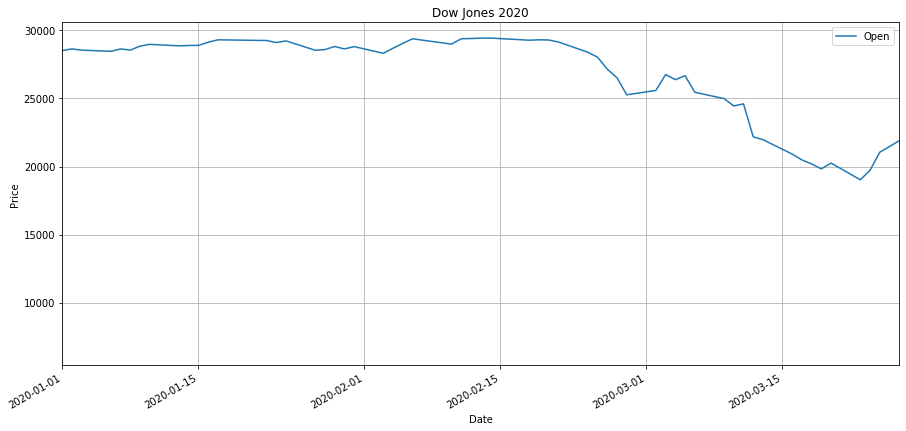

In [24]:
#DowJones price from beginning of 2020
dfjones['Date'] =  pd.to_datetime(dfjones['Date'])  
fig, ax = plt.subplots(figsize=(15,7))
#We are looking at the open price for each day
dfjones.plot(x="Date", y="Open", ax=ax, title="Dow Jones 2020")
#limit time frame between January to March of 2020
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 3, 27)])
plt.ylabel("Price")
ax.grid()

We can also observe below how Amazon stock price has changed as the COVID situation moved forward. We are seeing an increase in price starting from the 15th of March, which is when the term of "social distancing" and self-isolation started to gain traction, and when people started to grow more dependant on Amazon's service.

Depending on how the US and other countries handle the pandemic, we could see an even steeper increase in Amazon's prices if governments enforce a more strict self-isolation policy, or flatten/correction if countries like the US reopen the country by Easter.

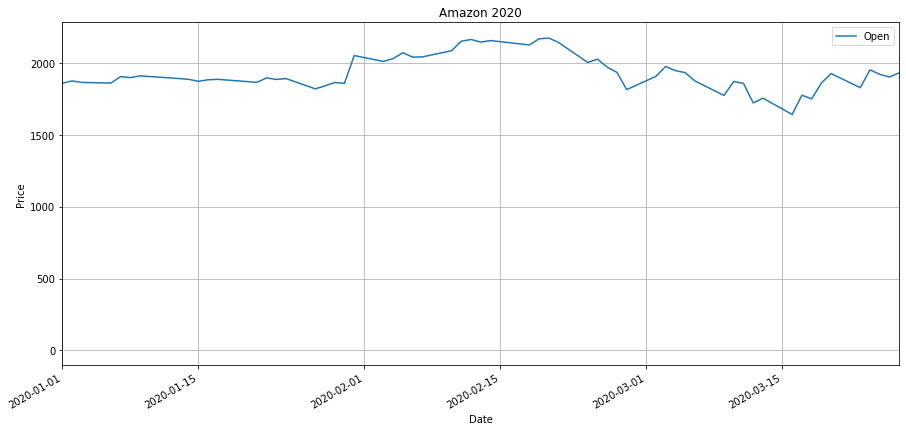

In [25]:
#Amazon stock price from beginning of 2020
dfAmazon['Date'] =  pd.to_datetime(dfAmazon['Date'])  
fig, ax = plt.subplots(figsize=(15,7))
dfAmazon.plot(x="Date", y="Open", ax=ax, title="Amazon 2020")
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 3, 27)])
plt.ylabel("Price")
ax.grid()

#### Relationships

Now that we have gone through all the line graphs we can see if there is any correlation between crypto-currencies and between DowJones and Amazon:

We can cover the relationship between Bitcoin, Ethereum, and Litecoin by just comparing two of them, since we can already see that the patterns are very similar, hence the relationsh between them will also be very high.

We can obsever from the scatterplot that the dots follow a straigh line upwards with very little width distance between our points. Indeed indicating a strong correlation between the two crypto-currencies (using Chinese Yuan as the exchange). 

We can confirm this by seeing the correlation function underneath: 0.946 (1 being the highest) is a very strong correlation, telling us that as one crypto-currency increases in value, so will the other crypto-currency.

We also see jumps in thedots, which are represented by the very rapid speed at which these crypto-currenecies increased and decreased in value.

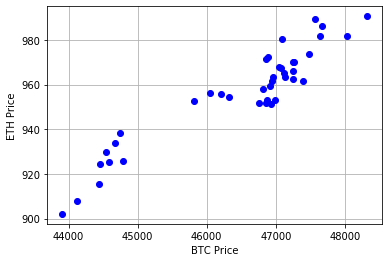

In [26]:
#Relationship between BTC and EHT in CNY
compareBTCETH = pd.concat([dfcyn0["Exchange_Rate"],dfcyn1["Exchange_Rate"]],axis=0,keys=["BTC","ETH"])

x = compareBTCETH["BTC"].tail(40)
y = compareBTCETH["ETH"].tail(40)
plt.ylabel("ETH Price")
plt.xlabel("BTC Price")
plt.grid()
plt.plot(x,y,'o', color='blue')


In [27]:
np.corrcoef(compareBTCETH["BTC"].tail(40),compareBTCETH["ETH"].tail(40))

array([[1.        , 0.94060126],
       [0.94060126, 1.        ]])

We will now see the relationship of Bitcoin with the odd crypto-currency out. We saw that Ripple had a much different pattern through the same amount of time as the other crypto-currencies. Below we can see the relationship between them. While Bitcoin and Ethereum had a very strong correlation, we can see that there is little to no correlation between Bitcoin and Ripple by looking at the graph alone, or the correlation number beneath of 0.14 (0 being no correlation).

It is interesting because the end result was similar for both crypto-currencies. 

It is important to note that there is not enough data to make any accurate assumptions, and I am just displaying the data I have so far, however, it would be interesting to see how it all unfolds over time, and how the correlations change.

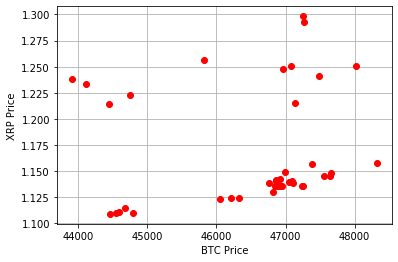

In [28]:
#Relationship between BTC and XRP in CNY
compareBTCXRP = pd.concat([dfcyn0["Exchange_Rate"],dfcyn3["Exchange_Rate"]],axis=0,keys=["BTC","XRP"])

x = compareBTCXRP["BTC"].tail(40)
y = compareBTCXRP["XRP"].tail(40)
plt.ylabel("XRP Price")
plt.xlabel("BTC Price")
plt.grid()
plt.plot(x,y,'o', color='red')


In [29]:
np.corrcoef(compareBTCETH["BTC"].tail(40),compareBTCXRP["XRP"].tail(40))

array([[1.        , 0.07266112],
       [0.07266112, 1.        ]])

Lastly, we can see the relationship between DowJones and Amazon prices. As shown below it is surprising to see a weak positive relationship. I would have expected to see a weak negative, as the DowJones took a big hit while Amazon stock price has been increasing. 

For the time being, we can say that there is a slight positive correlation (0.52) between the two. Perhaps this number will change the situation progresses.

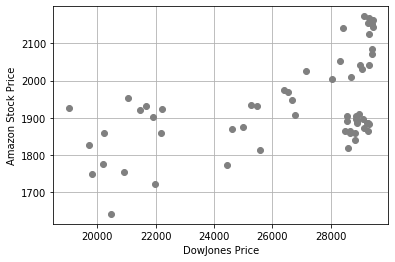

In [30]:
x = dfjones["Open"].tail(60)
y = dfAmazon["Open"].tail(60)
plt.ylabel("Amazon Stock Price")
plt.xlabel("DowJones Price")
plt.grid()
plt.plot(x,y,'o', color='grey')

In [31]:
np.corrcoef(dfjones["Open"].tail(60),dfAmazon["Open"].tail(60))

array([[1.        , 0.52820821],
       [0.52820821, 1.        ]])

## Conclusion

In conclusion, we have seen the patterns accross different crypto-currencies and stocks/index as we moved forward in this COVID-19 crisis. While we have come to some conclusions regarding trends and relationship, further testing and gathering of data is required to confirm those the statistical significance of those theories.

Based on the data and future reseach, we could expect to see an increase of value in crypto-currencies in a crisis, as well as the effect it would have over the economy (represented from DowJones), and on Retailing companies, noting that the current patterns and result might be due to the uniqueness of the situation as well as other outter factors.